In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
z_h = 100
z_0hi = 0.92
u_star = 0.29
k = 0.4
z_0lo = 0.0001
beta = 0.68
D = 100
delta_ibl_0 = z_h

In [3]:
d_rotor = 100
s_y = 2 * d_rotor
s_x = 2 * d_rotor

In [4]:
def square_park(park_length, park_width, x_start, y_start, plot):
    x_park = np.linspace(0, park_length, park_length)

    delta_ibl_x = delta_ibl_0 + z_0hi * (x_park/z_0hi)**(4/5)
    U_hT_x = (u_star / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)

    # Create a 2D array
    park_array = np.zeros((park_width, park_length))

    for y in range(len(U_hT_x)):
        park_array[0:park_width, y] = U_hT_x[y]

    if plot == True:
        # Set labels and title
        plt.imshow(park_array, aspect='auto', origin='lower')
        plt.gca().set_aspect('equal')
        plt.colorbar(label='U_hT [m/s]')
        plt.xlabel('Downstream distance [m]')
        plt.ylabel('Hub Height Velocity [m/s]')
        plt.xlim(0, park_length)
        plt.ylim(0, park_width)
        plt.title('park_array Plot')
        plt.show()

    return park_array, park_length, park_width, x_start, y_start

In [5]:
def overlay_lines_on_park(park_array, d_rotor, s_y, s_x, park_length, park_width):
    fig, ax = plt.subplots()
    ax.set_xlim(0, park_length)
    ax.set_ylim(0, park_width)

    # Overlay the vertical lines and add filled circles at their centers
    x = 0
    while x <= park_length:
        y = 0
        while y + d_rotor <= park_width:
            # Plot the vertical line
            ax.plot([x, x], [y, y + d_rotor], color='white', linewidth=1)  # Vertical line
            
            # Add filled white circle in the middle of the line
            y_mid = y + d_rotor / 2  # Midpoint of the line
            ax.scatter(x, y_mid, color='white', s=d_rotor/50, zorder=5)  # Circle at the center of the line
            
            y += d_rotor + s_y  # Move up by d_rotor length + spacing
        x += s_x  # Move to next column

    # Overlay the park array data
    im = ax.imshow(park_array, aspect='auto', origin='lower')
    ax.set_aspect('equal')
    plt.colorbar(im, ax=ax, label='U_hT [m/s]')
    ax.set_xlabel('Downstream distance [m]')
    ax.set_ylabel('Hub Height Velocity [m/s]')
    ax.set_title('Park Array with Overlay')
    plt.show()
    
    return ax


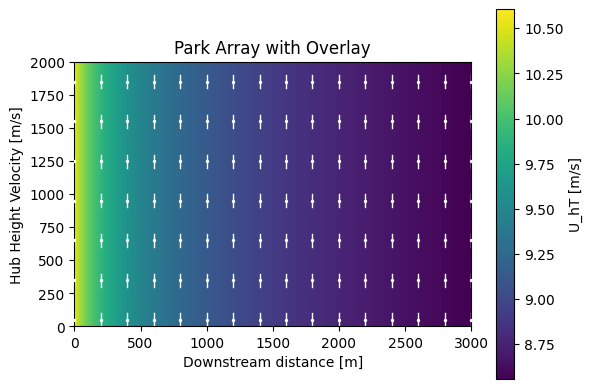

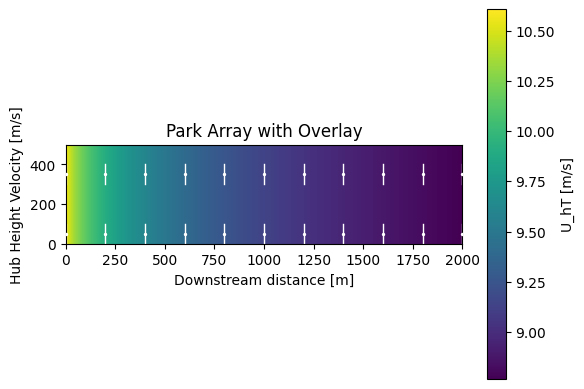

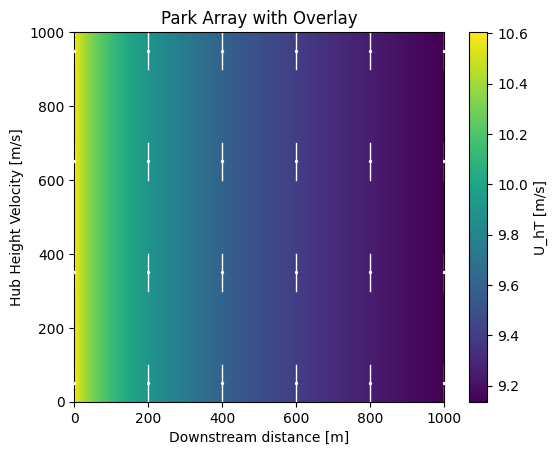

<Axes: title={'center': 'Park Array with Overlay'}, xlabel='Downstream distance [m]', ylabel='Hub Height Velocity [m/s]'>

In [6]:
park_amount = 3

# Park call: park_length, park_width, x_start, y_start, plot
park_1 = square_park(3000, 2000, 500, 2500, False)
park_2 = square_park(2000, 500, 2500, 500, False)
park_3 = square_park(1000, 1000, 1000, 800, False)

overlay_lines_on_park(park_1[0], d_rotor, s_y, s_x, park_1[1], park_1[2])
overlay_lines_on_park(park_2[0], d_rotor, s_y, s_x, park_2[1], park_2[2])
overlay_lines_on_park(park_3[0], d_rotor, s_y, s_x, park_3[1], park_3[2])

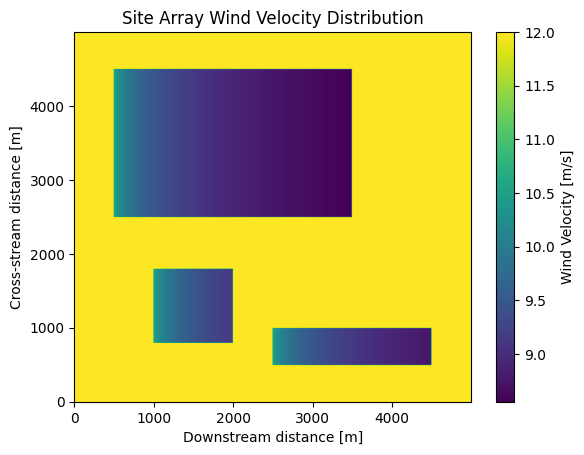

In [7]:
site_length = 5000
site_width = 5000
atmos_wind_vel = 12

site_array = np.full((site_width, site_length), float(atmos_wind_vel))

parks = []

park_string = "park_"

for i in range(1, park_amount + 1):

    park_string = park_string + str(i)

    # append here
    parks.append(eval(park_string))
    
    park_string = "park_"

for y in range(site_width):
    for x in range(site_length):

        for park in parks:

            if y >= park[4] and y < park[4] + park[2] and x >= park[3] and x < park[3] + park[1]:
                site_array[y, x] = park[0][y - park[4], x - park[3]]
        
        if site_array[y, x] == 0:
            site_array[y, x] = atmos_wind_vel

plt.imshow(site_array, aspect='auto', origin='lower')
plt.colorbar(label='Wind Velocity [m/s]')
plt.xlabel('Downstream distance [m]')
plt.ylabel('Cross-stream distance [m]')
plt.title('Site Array Wind Velocity Distribution')
plt.show()

hej